# Expore and Cleanup
and also add some features

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
import sys
sys.path.append('../Functions')
import CleanUp as p

In [2]:
file_path = '../Data/DM2425_ABCDEats_DATASET.csv'
df = pd.read_csv(file_path)
shape_of_df = df.shape
shape_of_df

(31888, 56)

## 1 Exploration

In [3]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


### 1.1 count the Nans

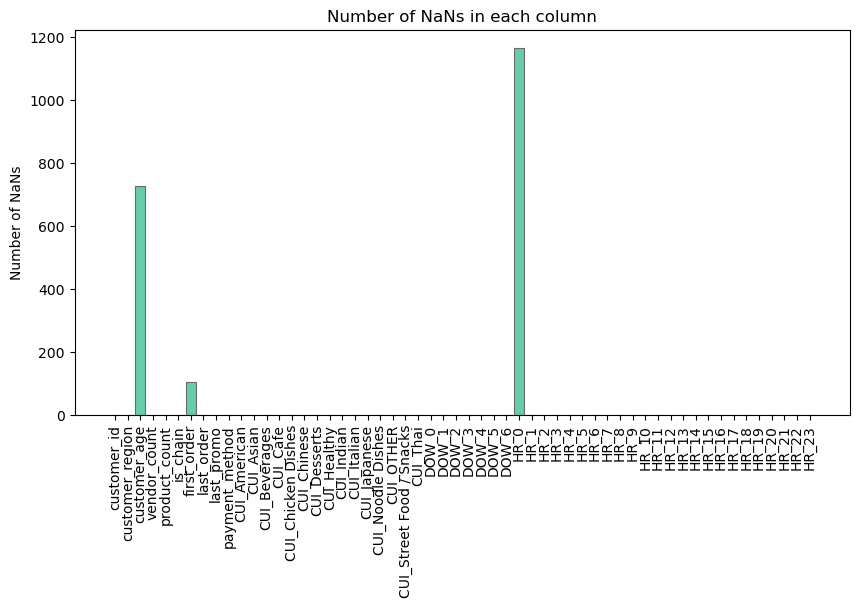

In [4]:
number_of_nans = df.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

### 1.2 Check for Duplicates in the primary key

by the shape of the dataset the primary key should be customer_id, as such every value in this column should be unique

In [5]:
primary_key = 'customer_id'
unique_values = df[primary_key].unique().shape
n_rows = df[primary_key].shape [0]
if unique_values != n_rows:
    print('oh no! there are repetitions!')
else:
    print("all good! no repetitions!")

oh no! there are repetitions!


In [6]:
#find repeated customer_id
repetitions = df[primary_key].value_counts()
#keep only the customer_id that are repeated
repetitions = repetitions[repetitions > 1]
repetitions = repetitions.index
repetitions

Index(['742ca068fc', 'b55012ee1c', 'df91183978', '6bbf5f74cd', '24251eb7da',
       '201a13a34d', 'b8e7a643a4', 'cc08ef25ce', '8aa9bbc147', '671bf0c738',
       '06018a56be', 'fac7984c0d', 'cf563a0a98'],
      dtype='object', name='customer_id')

In [7]:
for customer_id in repetitions:
    rep_df = df[df[primary_key] == customer_id]
    s = rep_df.shape
    s1 = 0
    for i in range(s[1]):
        s1 += rep_df.iloc[:,i].unique().shape[0]
    print(s1 - s[1])
    # remove ont of the repeated  primary keys
    if s1 - s[1] == 0:
        df = df.drop(rep_df.index[0])
        print('dropped repeated customer {p}'.format( p = customer_id))   

0
dropped repeated customer 742ca068fc
0
dropped repeated customer b55012ee1c
0
dropped repeated customer df91183978
0
dropped repeated customer 6bbf5f74cd
0
dropped repeated customer 24251eb7da
0
dropped repeated customer 201a13a34d
0
dropped repeated customer b8e7a643a4
0
dropped repeated customer cc08ef25ce
0
dropped repeated customer 8aa9bbc147
0
dropped repeated customer 671bf0c738
0
dropped repeated customer 06018a56be
0
dropped repeated customer fac7984c0d
0
dropped repeated customer cf563a0a98


In [8]:
df['first_order'].min()

0.0

In [9]:
print("rows: \t{p1} \nclients:{p2}".format( p1 = df.shape [0],
                                        p2 = df[primary_key].unique().shape[0]))


rows: 	31875 
clients:31875


## 2 Non Numerical Columns

In [10]:
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()
non_numerical_columns.remove(primary_key)
print(non_numerical_columns)

['customer_region', 'last_promo', 'payment_method']


In [11]:
for col in non_numerical_columns:
    print(f'{col}: {df[col].unique()}')

customer_region: ['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
last_promo: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
payment_method: ['DIGI' 'CASH' 'CARD']


### 2.1 customer_region
Geographic region where the customer is located.

In [12]:
df['customer_region'].unique()  

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

#### 2.1.1 deal with missing values 

In [13]:
df.loc[df['customer_region'] == '-', 'customer_region'] = np.nan

In [14]:
df['customer_region'].unique()  

array(['2360', '8670', '4660', '2440', nan, '4140', '2490', '8370',
       '8550'], dtype=object)

#### 2.1.2 exploration

In [15]:
region_count = df['customer_region'].value_counts()
region_percentage = region_count / region_count.sum() * 100
print(region_percentage)
region_nan = df['customer_region'].isnull().sum()
print(region_nan/df.shape[0]*100)

#order region_nan by alphabetical order
x = zip(list(region_count.index),list(region_count.values))
x = sorted(x, key=lambda x: x[0])
region_count = dict(x)
region_count

customer_region
8670    31.053352
4660    30.382083
2360    28.088315
2440     4.717972
4140     2.726434
8370     1.574778
2490     1.415710
8550     0.041358
Name: count, dtype: float64
1.3866666666666667


{'2360': 8829,
 '2440': 1483,
 '2490': 445,
 '4140': 857,
 '4660': 9550,
 '8370': 495,
 '8550': 13,
 '8670': 9761}

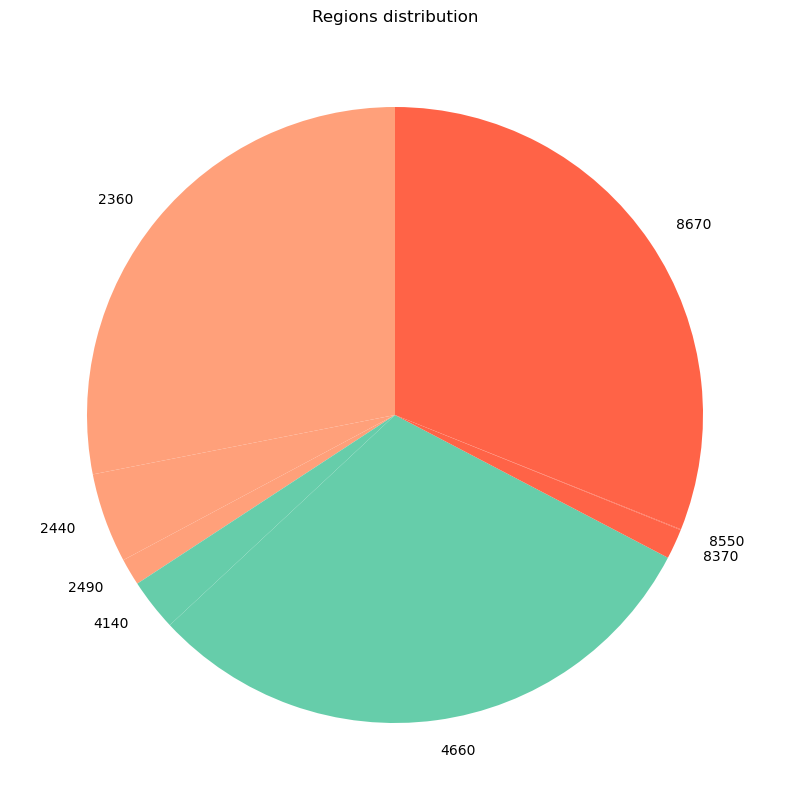

In [16]:
# Adjusted colors
colors = ['lightsalmon','lightsalmon', 'lightsalmon','mediumaquamarine','mediumaquamarine', 'tomato','tomato', 'tomato']

# Configuring the pie chart with labels and highlighting the most relevant slice
plt.figure(figsize=(20, 10))  # Setting figure size
plt.pie(region_count.values(),
        labels=region_count.keys(),
        colors=colors,
        startangle=90  # Rotate the start of the pie chart
)  # Creating the pie chart
plt.title('Regions distribution')  # Setting the title
plt.show()  # Displaying the plot




### 2.2 last_promo
The category of the promotion or discount most recently used by the
custome

#### 2.2.1 deal with missing values 

In [17]:
df['last_promo'].unique()

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE'], dtype=object)

In [18]:
# make a new boolean column the is called has_promo 

df['has_promo'] = df['last_promo'] != 'No_Promo'
df['has_promo'].describe()

count     31875
unique        1
top        True
freq      31875
Name: has_promo, dtype: object

#### 2.2.2 exploration

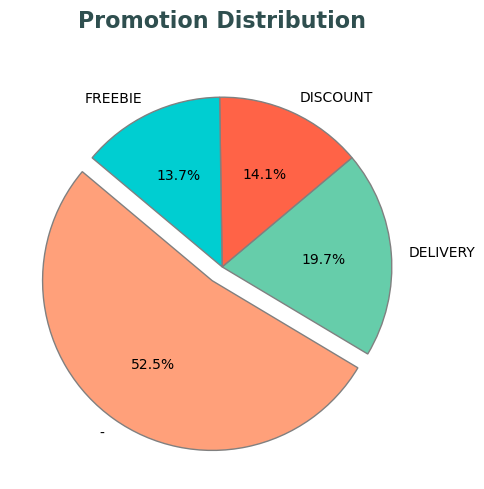

In [19]:
# Adjusted colors
colors = ['lightsalmon', 'mediumaquamarine', 'tomato', 'darkturquoise']

# Configuring the pie chart with labels and highlighting the most relevant slice
plt.figure(figsize=(10, 5))  # Setting figure size
plt.pie(df.last_promo.value_counts(), 
        colors=colors, 
        labels=df.last_promo.value_counts().index,  # Labels for each slice
        autopct='%1.1f%%',  # Percentages on each slice
        startangle=140,  # Starting angle for better layout
        explode=(0.1, 0, 0, 0),  # Highlight the first slice (adjust as needed)
        wedgeprops={'edgecolor': 'gray'})  # Gray borders for contrast

# Chart title
plt.title("Promotion Distribution", fontsize=16, fontweight='bold', color='darkslategray', pad=20)

# Displaying the chart
plt.tight_layout()
plt.show()

### 2.3 payment_method

In [20]:
df['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

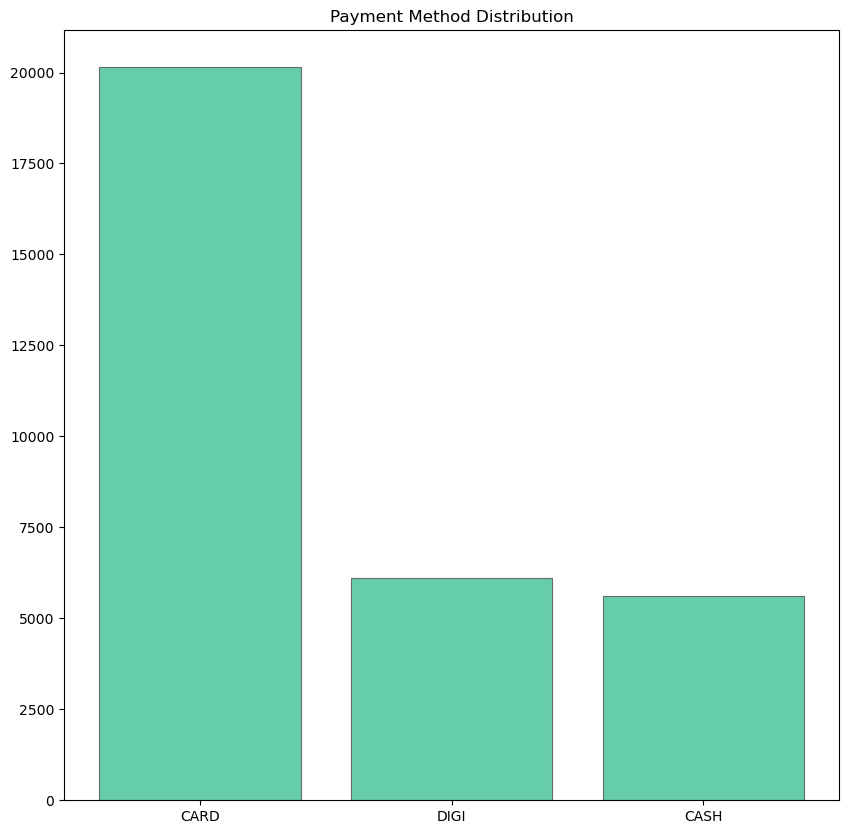

In [21]:
total_pay = df['payment_method'].value_counts()
plt.figure(figsize=(10,10))
plt.bar(x=total_pay.index, height=total_pay.values, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)
plt.title('Payment Method Distribution')
plt.show()

## 3 Numerical Columns

In [22]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numerical_columns)

['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']


### 3.1 vendor_count

In [23]:
df['vendor_count'].describe()

count    31875.000000
mean         3.102714
std          2.771753
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         41.000000
Name: vendor_count, dtype: float64

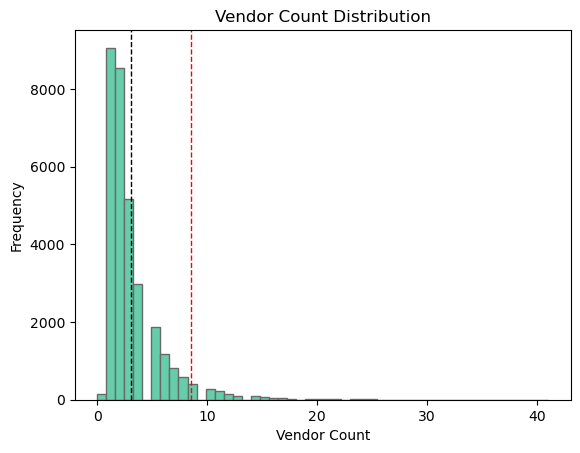

In [24]:
plt.hist(df['vendor_count'], bins = 50, color = 'mediumaquamarine', edgecolor = 'dimgray')

plt.xlabel('Vendor Count')
plt.ylabel('Frequency')
plt.title('Vendor Count Distribution')
#adda  line to shw the outliers
plt.axvline(df['vendor_count'].mean(), color='k', linestyle='dashed', linewidth=1)
Q1 = df['vendor_count'].quantile(0.25)
Q3 = df['vendor_count'].quantile(0.75)
IQR = Q3 - Q1
plt.axvline(Q3 + 1.5 * IQR, color='r', linestyle='dashed', linewidth=1)
plt.show()


### 3.2 product_count
Total number of products the customer has ordered.

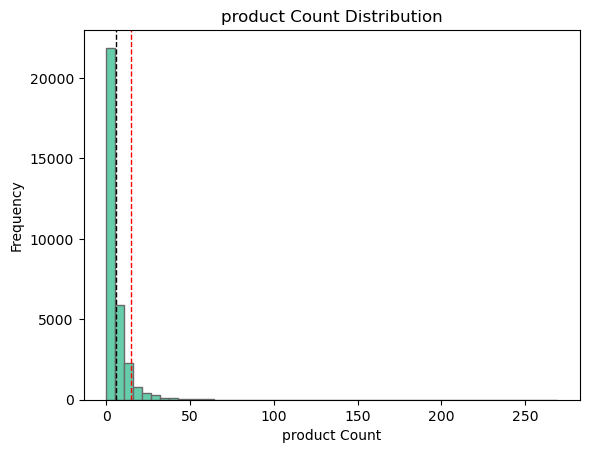

In [25]:
plt.hist(df['product_count'], bins = 50, color = 'mediumaquamarine', edgecolor = 'dimgray')

plt.xlabel('product Count')
plt.ylabel('Frequency')
plt.title('product Count Distribution')
#adda  line to shw the outliers
plt.axvline(df['product_count'].mean(), color='k', linestyle='dashed', linewidth=1)
Q1 = df['product_count'].quantile(0.25)
Q3 = df['product_count'].quantile(0.75)
IQR = Q3 - Q1
plt.axvline(Q3 + 1.5 * IQR, color='r', linestyle='dashed', linewidth=1)
plt.show()

### 3.3 is_chain
Indicates whether the customer’s order was from a chain restaurant.

### 3.3.1 exploration

In [26]:
df['is_chain'].describe()

count    31875.000000
mean         2.819357
std          3.977977
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         83.000000
Name: is_chain, dtype: float64

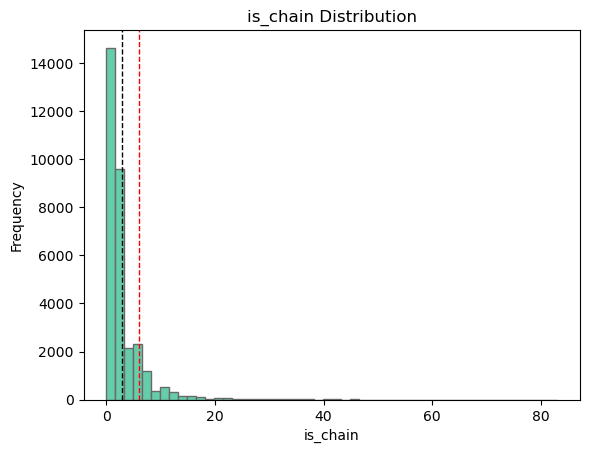

In [27]:
plt.hist(df['is_chain'], bins = 50, color = 'mediumaquamarine', edgecolor = 'dimgray')

plt.xlabel('is_chain')
plt.ylabel('Frequency')
plt.title('is_chain Distribution')
#adda  line to shw the outliers
plt.axvline(df['is_chain'].mean(), color='k', linestyle='dashed', linewidth=1)
Q1 = df['is_chain'].quantile(0.25)
Q3 = df['is_chain'].quantile(0.75)
IQR = Q3 - Q1
plt.axvline(Q3 + 1.5 * IQR, color='r', linestyle='dashed', linewidth=1)
plt.show()

#### 3.3.2 check fr consistency with product_count and vendor_count

In [28]:
print("product_count-->",(df['product_count'] - df['is_chain']).min())
print("vendor_count-->",(df['vendor_count'] - df['is_chain']).min())

product_count--> -1
vendor_count--> -76


## 3 Recount the missing values after the mild preprocessing

In [29]:
#check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

customer_region     442
customer_age        727
first_order         106
HR_0               1164
dtype: int64

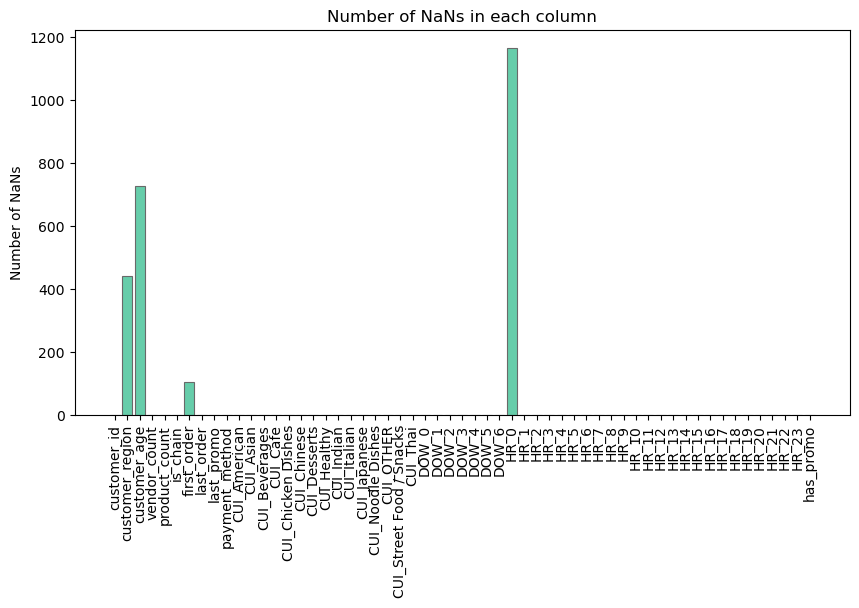

In [30]:
number_of_nans = df.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

FYI,there are missing values

## 3 Build New Features

In [31]:
new_fetures_list = []
# is there  a naming convention for new features?

### 3.1 customer_city

In [32]:
df['customer_city'] = df['customer_region'].str[0]
df['customer_city'].unique()
new_fetures_list.append('customer_city')

In [33]:
city_count = df['customer_city'].value_counts()
city_percentage = city_count / city_count.sum() * 100
print(city_percentage)

customer_city
2    34.221996
4    33.108517
8    32.669487
Name: count, dtype: float64


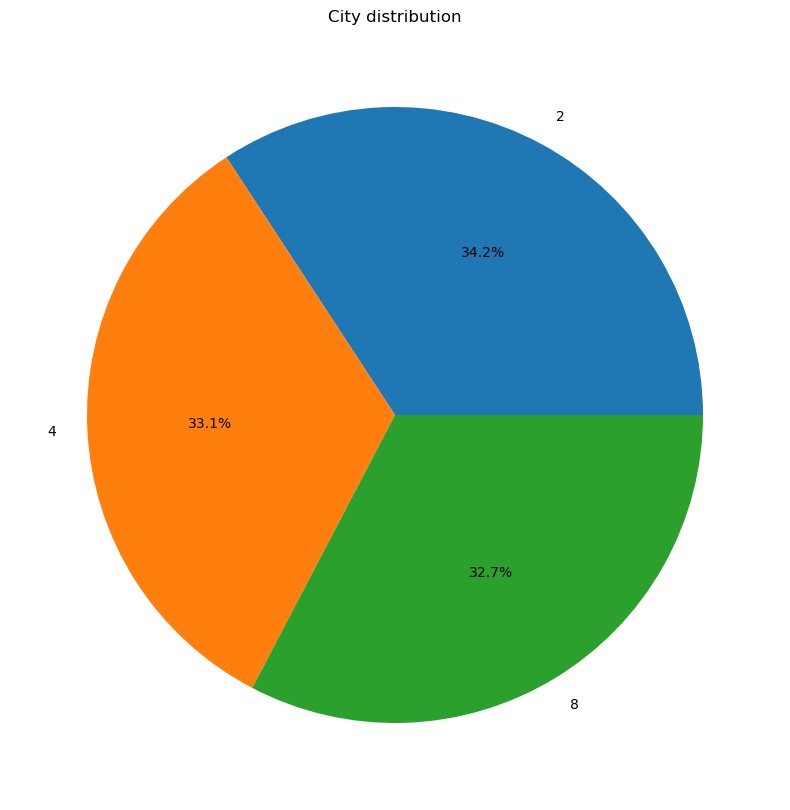

In [34]:
plt.figure(figsize=(10,10))
plt.pie(city_percentage, labels = city_percentage.index, autopct='%1.1f%%')
plt.title('City distribution')
plt.show()

### 3.2 used_promo

In [35]:
df['used_promo']= df['last_promo'] != 'No_Promo'
new_fetures_list.append("used_promo")

### 3.3 order_count
The total amount of orders each customer made. <br>
it can either be calculated by summung the DOW orders or the HR orders, let's see if the result is consistent <br>
as we have seen at teh beginning, there are nans in the HR, so it's eay to expecr a discrepancy

In [36]:
DOW_col = [col for col in df.columns if col.startswith('DOW')]
HR_col = [col for col in df.columns if col.startswith('HR')]
DOW_col_sum = df[DOW_col].sum(axis=1)
HR_col_sum = df[HR_col].sum(axis=1)
Delta_DOW_HR = DOW_col_sum-HR_col_sum
Delta_DOW_HR.value_counts()

0.0     30711
1.0       934
2.0       159
3.0        39
4.0        15
5.0         8
9.0         2
6.0         2
12.0        1
8.0         1
7.0         1
11.0        1
15.0        1
Name: count, dtype: int64

the values are not consistent <br>
But we can notice that the values are always positive! <br>
Since there are also missing values in HR, it's possible to assume that HR is underestimating and we can fill the missing values with the difference
meanwhile the new feature Total_Orders will be made using the DOW data

In [37]:
df['order_count'] = DOW_col_sum
HR_col_from1 = HR_col.copy()
HR_col_from1.remove('HR_0')
HR_col_from1_sum = df[HR_col_from1].sum(axis=1)
df['HR_0'] = DOW_col_sum - HR_col_from1_sum

df[HR_col].sum().sum() - df[DOW_col].sum().sum()

0

#### check for consistency with is_chain

In [38]:
print("order_count -->",(df['order_count'] - df['is_chain']).min())

order_count --> -1


there are cases that are values of is_chain tha are bigger than teh number of orders and product count or the vendor count, this gives problem reagrding teh interpretation

### 3.4 avg_product_by_Order

In [39]:
df['avg_product_by_order'] = df['product_count'] /df['order_count']
new_fetures_list.append("avg_product_by_order")

### 3.5 delta_day_order
shows the time passed beween the first order and the last order
-- note:
we could adjust the parameter by using the highest day for the last order in the dataframe as today

In [40]:

df['delta_day_order'] = df['last_order'] - df['first_order'] + 1
new_fetures_list.append('delta_day_order')

### 3.6 tot_value_cui
shows the total amunt of money spent on the app across all options

In [41]:
cui_columns = [col for col in df.columns if col.startswith('CUI')]
df['tot_value_cui'] = df[cui_columns].sum(axis=1)
new_fetures_list.append('tot_value_cui')

### 3.7 order_freq
more insightful informations about our customers habits

In [42]:
df['order_freq'] = p.safe_divide(df['order_count'], df['delta_day_order'])
new_fetures_list.append('order_freq')


### 3.8 value_freq


In [43]:
df['value_freq'] =p.safe_divide(df['tot_value_cui'], df['delta_day_order'])
new_fetures_list.append('value_freq')


### 3.9 product_freq


In [44]:
df['product_freq'] = p.safe_divide(df['product_count'], df['delta_day_order'])
new_fetures_list.append('product_freq')


### 3.10 avg_order_value


In [45]:
df['avg_order_value'] = p.safe_divide(df['tot_value_cui'], df['order_count'])
new_fetures_list.append('avg_order_value')
df['avg_order_value'] = np.where(df['product_count'] != 0, df['tot_value_cui'] / df['product_count'], 0)

### 3.11 avg_product_value


In [46]:
df['avg_product_value'] = p.safe_divide(df['tot_value_cui'], df['product_count'])
new_fetures_list.append('avg_product_value')


### 3.12 is_chain_bool (not added)

In [47]:
df['is_chain_bool'] = df['is_chain'] != 0
new_fetures_list.append("is_chain_bool")
x = df[['is_chain_bool','order_count','vendor_count','product_count']]
x_true = x[x['is_chain_bool']]
print(x_true['is_chain_bool'].unique())
print(x_true['order_count'].min())
print(x_true['vendor_count'].min())
print(x_true['product_count'].min())

[ True]
0
0
0


### 3.13 our new features

In [48]:
df[new_fetures_list].describe ()

,avg_product_by_order,delta_day_order,tot_value_cui,order_freq,value_freq,product_freq,avg_order_value,avg_product_value
count,31737.000000,31769.000000,31875.000000,31756.000000,31756.000000,31756.000000,31875.000000,31706.000000
mean,1.298896,36.414901,38.295857,0.350840,4.321340,0.470893,7.536316,7.571845
std,0.418477,29.415668,46.410657,0.413260,7.994837,0.648746,4.076761,4.051451
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370000
25%,1.000000,4.000000,12.880000,0.076923,0.530797,0.093333,4.092111,4.124250
50%,1.166667,35.000000,24.140000,0.133333,1.123640,0.171053,6.905000,6.940000
75%,1.500000,63.000000,44.970000,0.500000,3.720391,0.666667,10.125833,10.137500
max,6.000000,91.000000,1418.330000,4.000000,141.120000,14.000000,24.390000,24.390000


In [49]:
#check for missing values
missing_values_new_features = df[new_fetures_list].isnull().sum()
missing_values_new_features = [missing_values > 0]

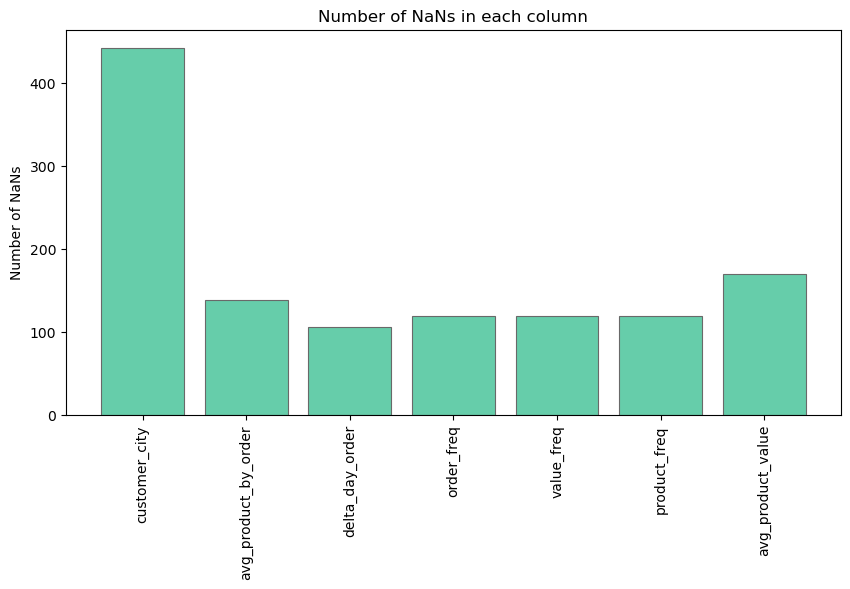

In [50]:
# plot #check for missing values
missing_values_new_features = df[new_fetures_list].isnull().sum()
missing_values_new_features = missing_values_new_features[missing_values_new_features > 0]
plt.figure(figsize=(10, 5))
plt.bar(missing_values_new_features.index, missing_values_new_features, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs')
plt.title('Number of NaNs in each column')

plt.show()

### Check if I made a mess

In [52]:
nan_inf_counts_list = []

for new_feture in new_fetures_list:
    nan_count = df[new_feture].isna().sum()
    inf_count = df[new_feture].isin([np.inf, -np.inf]).sum()
    nan_inf_counts = {
        'feature': new_feture,
        'nan_count': nan_count,
        'inf_count': inf_count
    }
    
    nan_inf_counts_list.append((new_feture, nan_count, inf_count))
    
df_naninf = pd.DataFrame(nan_inf_counts_list, columns=['feature', 'nan_count', 'inf_count'])
df_naninf

,feature,nan_count,inf_count
0,customer_city,442,0
1,used_promo,0,0
2,avg_product_by_order,138,0
3,delta_day_order,106,0
4,tot_value_cui,0,0
5,order_freq,119,0
6,value_freq,119,0
7,product_freq,119,0
8,avg_order_value,0,0
9,avg_product_value,169,0


In [53]:
df[new_fetures_list].describe()

,avg_product_by_order,delta_day_order,tot_value_cui,order_freq,value_freq,product_freq,avg_order_value,avg_product_value
count,31737.000000,31769.000000,31875.000000,31756.000000,31756.000000,31756.000000,31875.000000,31706.000000
mean,1.298896,36.414901,38.295857,0.350840,4.321340,0.470893,7.536316,7.571845
std,0.418477,29.415668,46.410657,0.413260,7.994837,0.648746,4.076761,4.051451
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370000
25%,1.000000,4.000000,12.880000,0.076923,0.530797,0.093333,4.092111,4.124250
50%,1.166667,35.000000,24.140000,0.133333,1.123640,0.171053,6.905000,6.940000
75%,1.500000,63.000000,44.970000,0.500000,3.720391,0.666667,10.125833,10.137500
max,6.000000,91.000000,1418.330000,4.000000,141.120000,14.000000,24.390000,24.390000
